<a href="https://colab.research.google.com/github/OrYSlliu/Labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [21]:
df = pd.read_csv("/content/education_expenditure_supplementary_data.csv", index_col=None, header=0, engine='python')
Y = df['institute_type']
X = df['2000']
X = X.dropna()
v = df['2000'].dropna()
df

,country,institute_type,direct_expenditure_type,1995,2000,2005,2009,2010,2011
0,OECD Average,All Institutions,Public,4.9,4.9,5.0,5.4,5.4,5.3
1,Australia,All Institutions,Public,4.5,4.6,4.3,4.5,4.6,4.3
2,Austria,All Institutions,Public,5.3,5.4,5.2,5.7,5.6,5.5
3,Belgium,All Institutions,Public,5.0,5.1,5.8,6.4,6.4,6.4
4,Canada,All Institutions,Public,5.8,5.2,4.8,5.0,5.2,NaN
...,...,...,...,...,...,...,...,...,...
328,Turkey,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN
329,United Kingdom,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,1.2
330,United States,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,2.7
331,Brazil,Higher Education Institutions,Total,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
describe =  X.describe()
describe

count    99.000000
mean      3.062626
std       1.725475
min       0.500000
25%       1.200000
50%       3.300000
75%       4.350000
max       6.600000
Name: 2000, dtype: float64

In [6]:
mean = df.groupby(Y)['2000'].mean()
mean

institute_type
All Institutions                          4.821212
Elementary and Secondary Institutions     3.393939
Higher Education Institutions             0.972727
Name: 2000, dtype: float64

In [7]:
median = df.groupby(Y)['2000'].median()  # (медиана) ваш код здесь
median

institute_type
All Institutions                          4.6
Elementary and Secondary Institutions     3.4
Higher Education Institutions             0.9
Name: 2000, dtype: float64

In [8]:
mode = df.groupby(Y)['2000'].agg(pd.Series.mode)# (мода) ваш код здесь
mode

institute_type
All Institutions                                           4.3
Elementary and Secondary Institutions     [2.7, 3.3, 3.4, 3.7]
Higher Education Institutions                       [0.8, 1.0]
Name: 2000, dtype: object

In [9]:
min = df.groupby(Y)['2000'].min() # (минимум) ваш код здесь
min

institute_type
All Institutions                          3.0
Elementary and Secondary Institutions     1.7
Higher Education Institutions             0.5
Name: 2000, dtype: float64

In [10]:
max = df.groupby(Y)['2000'].max()# (максимум) ваш код здесь
max

institute_type
All Institutions                          6.6
Elementary and Secondary Institutions     4.6
Higher Education Institutions             1.7
Name: 2000, dtype: float64

In [11]:
std = df.groupby(Y)['2000'].std()# (стандартное отклонение) Ваш код здесь
std

institute_type
All Institutions                          0.887327
Elementary and Secondary Institutions     0.658094
Higher Education Institutions             0.301323
Name: 2000, dtype: float64

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [12]:
q1 = df.groupby(Y)['2000'].quantile(0.25)# (25% квантиль) ваш код здесь
q1

institute_type
All Institutions                          4.3
Elementary and Secondary Institutions     2.9
Higher Education Institutions             0.8
Name: 2000, dtype: float64

In [13]:
q2 = df.groupby(Y)['2000'].quantile(0.5) # (50% квантиль) ваш код здесь
q2

institute_type
All Institutions                          4.6
Elementary and Secondary Institutions     3.4
Higher Education Institutions             0.9
Name: 2000, dtype: float64

In [14]:
q3 = df.groupby(Y)['2000'].quantile(0.75)# (75% квантиль) ваш код здесь
q3

institute_type
All Institutions                          5.5
Elementary and Secondary Institutions     3.7
Higher Education Institutions             1.2
Name: 2000, dtype: float64

In [15]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

institute_type
All Institutions                          1.2
Elementary and Secondary Institutions     0.8
Higher Education Institutions             0.4
Name: 2000, dtype: float64

Какие выводы можно сделать исходя из полученных статистических данных?

**Вывод: тип 'All Institutios' имеет наивысшую важность**

```

```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: xlabel='2000', ylabel='count'>

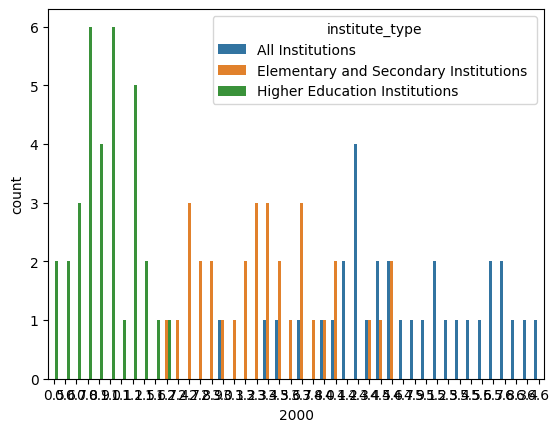

In [17]:
sns.countplot(x = X, hue = Y, data = df)

In [ ]:
#Гистограмма показывает что институт высшего образования имеет большую сумму рейтинга

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

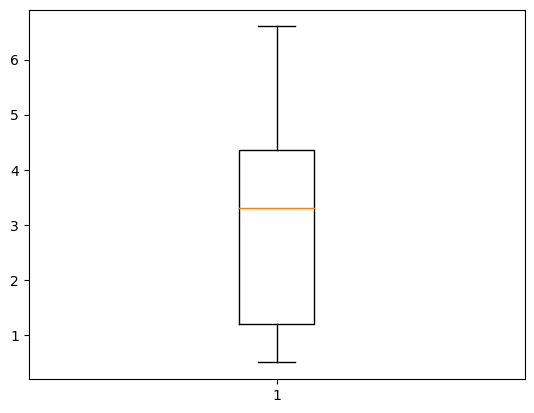

In [ ]:
plt.boxplot(X)
plt.show()

In [ ]:
# выбросов нет

<Axes: xlabel='2000', ylabel='institute_type'>

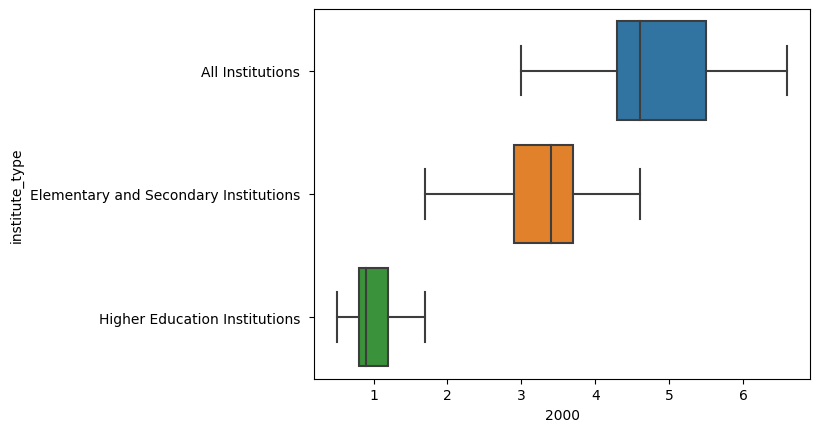

In [ ]:
sns.boxplot(x = X, y = Y, data = df)

In [ ]:
# учебные заведения со смешенным типом образования имеет большие рейтинги

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

ValueError: ignored

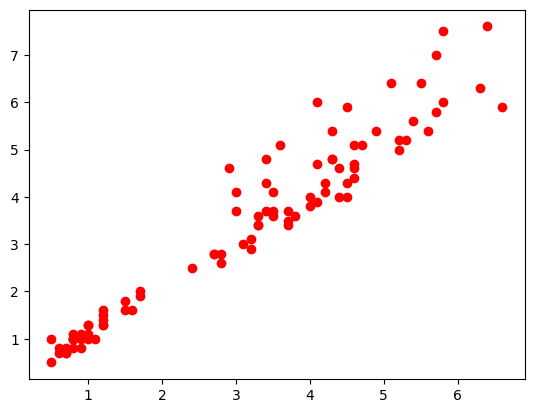

In [ ]:
plt.scatter(x = df['2000'], y = df['2010'],color='red')
plt.xlabel(df['2000'])
plt.ylabel(df['2010'])
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

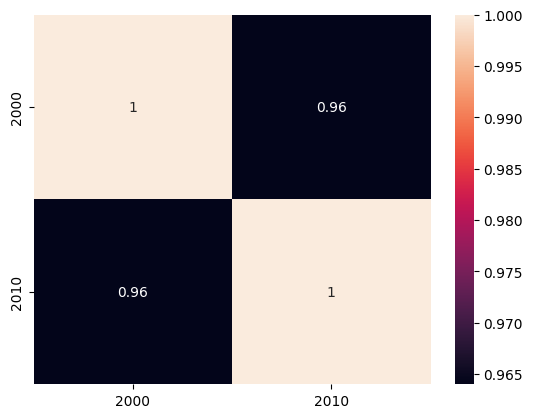

In [24]:
corr_matrix = df[['2000','2010']].corr()
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

**рейтинг 2010 года зависит от 2000**

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

### Пример реализации одного метода

In [27]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result

  def detect_outline_by_shovene(self,colum_name):
    result = []
    count_column = self.de[colum_name].count()
    for num in self.df[column_name]:
      mean = self.df[column_name].mean()
      std = self.df[column_name].std()
      if math.erfc((abs(num - mean))/std)> 1/(2*count_column):
        result.append(num)
      else:
        column_name -= 1
    return result

  def detect_ountline_by_quantile(self,colimn_name):
    pass

In [28]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]